In [1]:
1+1

2

# Table of contents
## Import Tensorflow
## Download and prepare the CIFAR10 dataset
## Verify the data
## Create the convolusion base
## Add Dense layers on top
## Compile and train the model
## Evaluate the model

# Import Tensorflow

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download and prepare the CIFAR10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_img, train_lb), (test_img, test_lb) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_img, test_img = train_img / 255.0, test_img / 255.0

170500096/170498071 [==============================] - 125s 1us/step


# Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

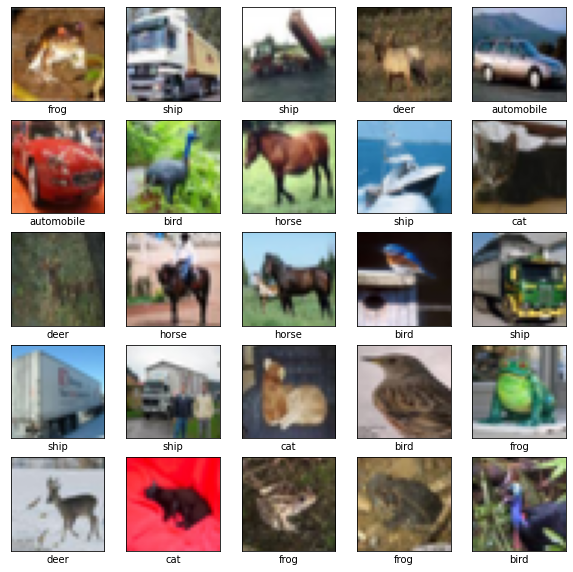

In [4]:
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','ship','truck']

plt.figure(figsize=(10,10))

for i in range(25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i])
    plt.xlabel(class_name[train_lb[i][0]])

plt.show()

# Create the convolusional base
The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

# Add Dense layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

# Compile and train the model

In [8]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

history = model.fit(train_img, train_lb, epochs = 10,
validation_data=(test_img, test_lb))

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5426 - accuracy: 0.4352 - val_loss: 1.2774 - val_accuracy: 0.5352
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1960 - accuracy: 0.5743 - val_loss: 1.1003 - val_accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0519 - accuracy: 0.6272 - val_loss: 1.0192 - val_accuracy: 0.6432
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9601 - accuracy: 0.6629 - val_loss: 0.9411 - val_accuracy: 0.6666
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8880 - accuracy: 0.6878 - val_loss: 0.9204 - val_accuracy: 0.6791
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8387 - accuracy: 0.7055 - val_loss: 0.8977 - val_accuracy: 0.6921
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7843 - accuracy: 0.7251 - val_loss: 0.8859 -

# Evaluate the model

313/313 - 3s - loss: 0.8604 - accuracy: 0.7028
test_acc :  0.7027999758720398 



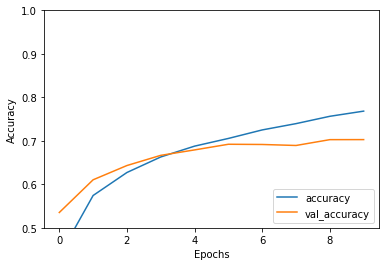

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_img, test_lb, verbose = 2)
print('test_acc : ', test_acc, '\n')